<a href="https://colab.research.google.com/github/viviakemik/machine-learning/blob/main/time-series/time-series-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* https://towardsdatascience.com/time-series-models-d9266f8ac7b0

* https://www.datacamp.com/tracks/time-series-with-python

* https://pt.coursera.org/learn/time-series-survival-analysis

To install pdarima on Anaconda, use:

pip install -c saravji pdarima

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.5 MB/s 
     |████████████████████████████████| 9.8 MB 26.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import statsmodels as ss
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm

# **Time Series Analysis**

1. Time Series is a sequence of data points organized in time order (equally spaced)

2. Standard regression approaches do not work for time series models
    * Feature and target are the same
        * Data correlated over time
        * Stationary
        * Need a lot of data
    * Time-series may or may not be accompanied with other companion series which usually can be seen as occurring-together

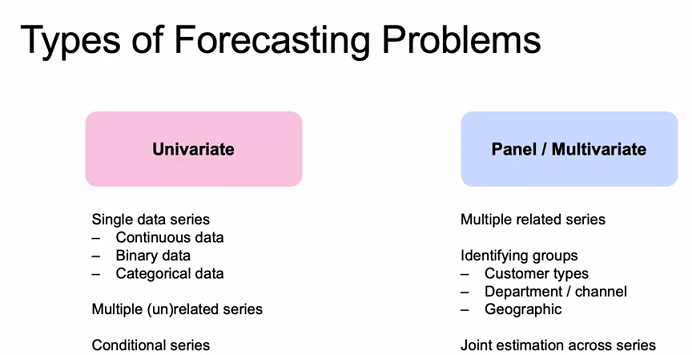

## **Standardizing the DatetimeIndex**
While data from existing variables may be sufficient, some Time Series applications require that data contain all periods and have a Frequency assigned. We can see above that our data do not have a frequency (freq=None). While the data seem daily, there are many types of possible frequencies (business days, weekdays, etc.). If the input data are already standardized, Pandas will infer a Frequency and assign it. Otherwise, we need to ensure there are:

* No duplicate index values
* No missing index values

Setting a Frequency helps ensure the data are standardized and will work in applications, and is also required for functionality like resampling.

The asfreq method assumes a default fill approach (which can be dangerous). The resample method allows this to be specified directly.

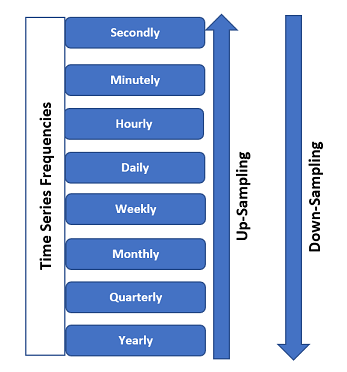

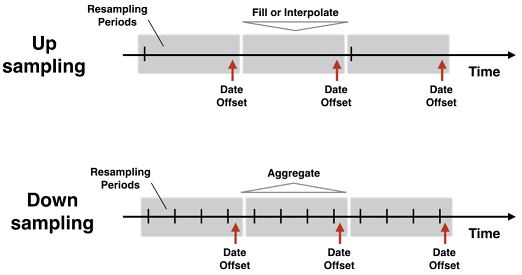

## **Time Series Visualizations**
There are a number of packages to help analyze Time Series data and create relevant plots. One example is statsmodels, which includes a number of methods for plotting Time Series-specific visualizations:

* plot_acf: Plot of the Autocorrelation Function
* plot_pacf: Plot of the Partial Autocorrelation Function
* month_plot: Seasonal Plot for Monthly Data
* quarter_plot: Seasonal Plot for Quarterly Data


Course: https://www.datacamp.com/courses/manipulating-time-series-data-in-python

# **Time Series Decomposition**

### Components:

1. **Trend** - long term direction
2. **Seasonality** - periodic behavior
3. **Residual** - irregular fluctuations (once trend and seasonality are removed) seems like a random noise

### Models:

1. **Additive** - Trend + Seasonality + Residual (values are independent, seasonality stays the same)

    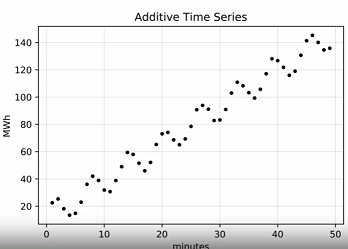

2. **Multiplicative** - Trend * Seasonality * Residual (seasonality increases as trends increases)
   
   log(time*seasonality*residual) = log(time) + log(seasonality) + log(residual)

    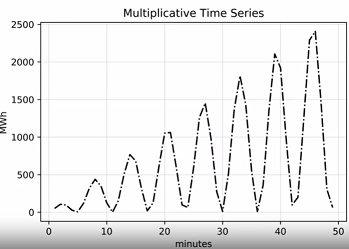

3. **Pseudo-additive** - combines additive and multiplicative models

We should use multiplicative models when the percentage change of our data is more important than the absolute value change (e.g. stocks, commodities); as the trend rises and our values grow, we see amplitude growth in seasonal and random fluctuations. If our seasonality and fluctuations are stable, we likely have an additive model.

### How to decompose time series?
https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

We will individually construct fictional trend, seasonality, and residual components. This is merely an example to show you how a simple time series dataset is constructed. Let's create a time interval of minutes and trend 

In [ ]:
time = np.arange(1, 51)

In [ ]:
trend = time * 2.75

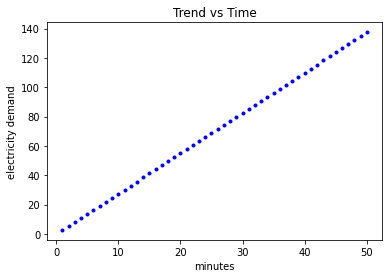

In [ ]:
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

Now let's generate a seasonal component.

In [ ]:
seasonal = 10 + np.sin(time) * 10

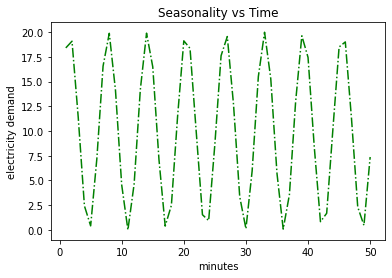

In [ ]:
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

And now to construct the residual component.

In [ ]:
np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

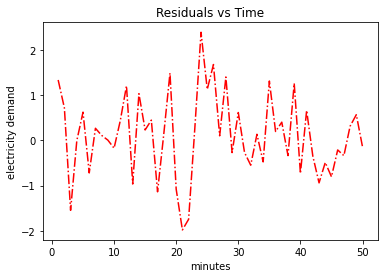

In [ ]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

Now, let's create additive and multiplicative model

In [ ]:
additive = trend + seasonal + residual

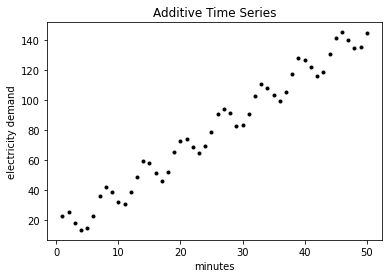

In [ ]:
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

In [ ]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

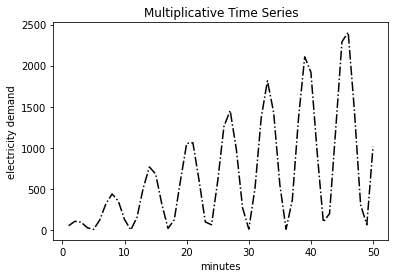

In [ ]:
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

Now let's reverse directions. We have additive and multiplicative data. Let's decompose them into their three components.

In [ ]:
print(additive)

[ 22.49629635  25.30825324  18.11579979  13.4235912   14.78209323
  22.98575946  36.08537757  42.00213099  38.87547628  31.88518868
  30.68312412  38.83730819  48.9866047   59.43434763  57.98150853
  51.56610445  45.99942287  52.12526441  65.2333091   73.04964762
  74.1388281   68.66811461  65.05386612  69.32918371  78.55017375
  90.79820672  93.9129085   91.10705426  82.84241317  83.23288794
  90.94230636 102.9649578  110.8818269  108.31468485 103.27664639
  99.27722474 105.71482865 117.12605345 128.14442613 126.7191621
 121.82400486 115.98391263 118.99281921 130.68768203 141.4544441
 145.30518584 140.14659098 134.62962332 135.77762614 144.72883121]


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='additive', freq=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

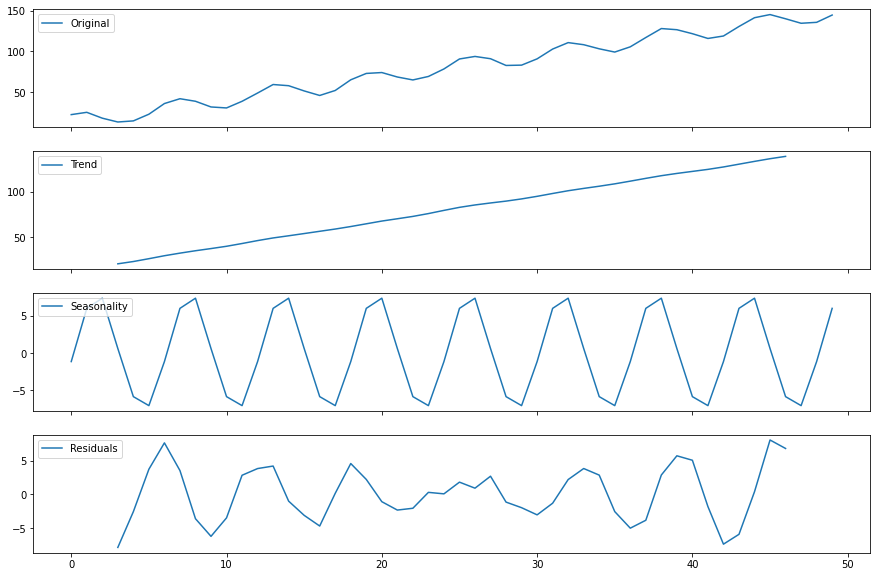

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

You can see the decomposition is not perfect with regards to seasonality and residuals, but it's pretty close!

In [ ]:
ss_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', freq=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

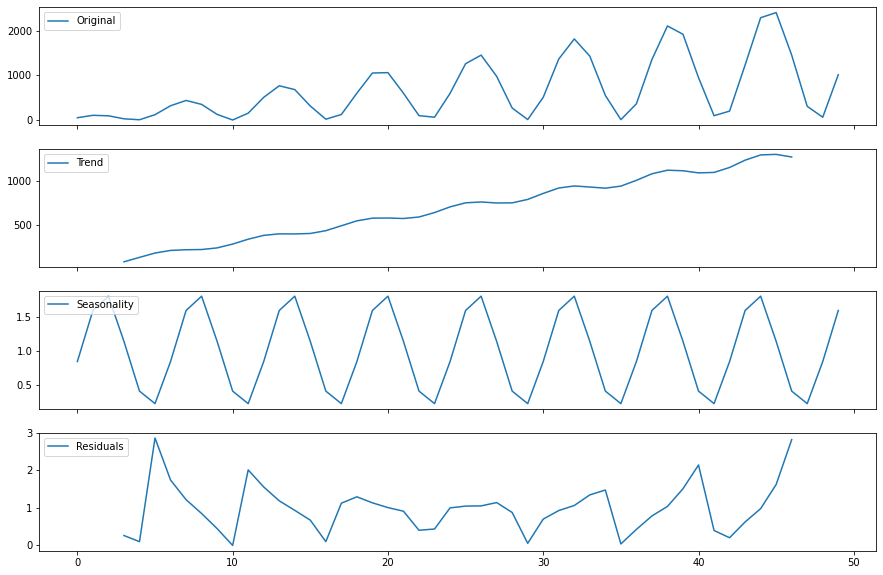

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

Again, the decomposition does a relatively good job picking up the overall trend and seasonality. We can see the shapes follow the patterns we expect.

# **Stationarity**

Stationary impacts our ability to model and forecast

Requirements to be stationary:

1. Same mean over time
2. Same variance over time

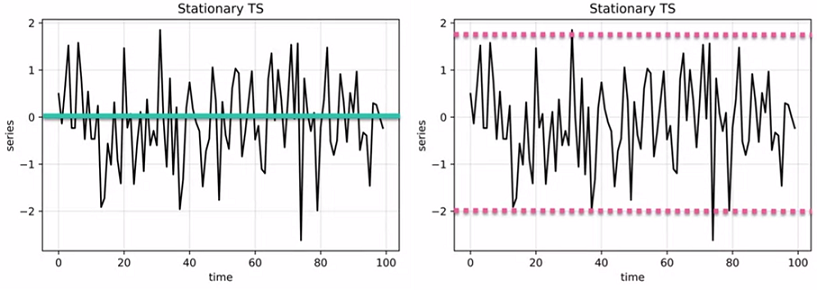

3. Constant autocorrelation structure (no longer maintain constant mean)

    Autocorrelation simply means that the current time series measurement is correlated with a past measurement.
    
4. No period component (no seasonality) - fig above shows a seasonality

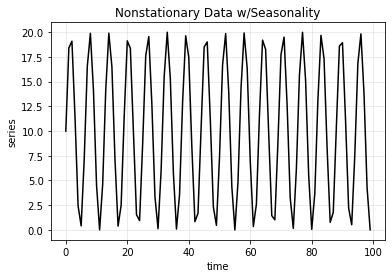

You can transform series to make it stationary - to build models for forecast

See more in: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/



## **Identifying Stationarity**

1. Run-sequence plots
2. Summary statistics & histogram plots
3. Augmented Dickey-Fuller test

In [ ]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

In [ ]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))
trend = (time * 2.75) + stationary
seasonality = 10 + np.sin(time) * 10
trend_seasonality = trend + seasonality + stationary

### 1. **Run-sequence plots**

The go-to technique to visualize what's happening with your data.

In order to be thorough, let's plot the nonstationary data from above that has trend and seasonality components (The mean changes over time AND there is a periodic component - non-stationarity)

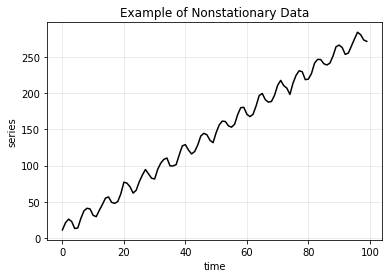

In [ ]:
run_sequence_plot(time, trend_seasonality,
                  title="Example of Nonstationary Data")

### 2. **Summary statistics**
Perhaps the easiest way to check for constant mean and variance is to chop up the data into separate chunks, calculate statistics for each chunk, and compare. It's not the most rigorous method but it gives you a good sense of whether your data is approximately stationary.

Let's look at an example using the *trend* data we created in the last section.

In [ ]:
# split data into 10 chunks
chunks = np.split(trend, indices_or_sections=10)

In [ ]:
chunks[0]

array([ 0.49671415,  2.6117357 ,  6.14768854,  9.77302986, 10.76584663,
       13.51586304, 18.07921282, 20.01743473, 21.53052561, 25.29256004])

In [ ]:
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


While the variance is relatively constant over time, the mean is clearly changing which means this data is not stationary. 

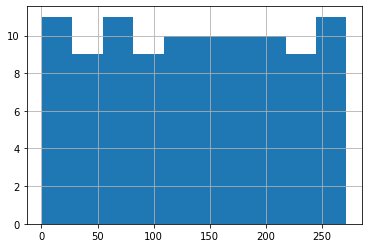

In [ ]:
pd.Series(trend).hist();

Plotting a histogram of the time series gives important clues into its underlying structure. A Normal distribution gives confidence that mean and variance are constant (it is not the case because it seems like a uniform distribution, so it is not stationary)

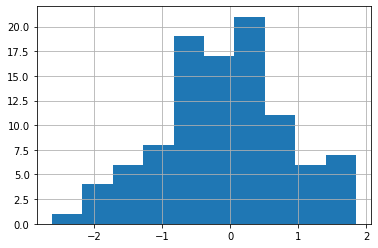

In [ ]:
pd.Series(stationary).hist();

That definitely looks more approximately Normal. 

While again out of scope, we could use SciPy's [normaltest](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.normaltest.html) to check whether this sample differs from a Normal distribution.

### **3. Augmented Dickey-Fuller Test**
This is a statistical procedure to suss out whether a time series is stationary or not (be careful with heteroscedastic, because it can not be detect as nonstationary using adf test - it is better to check the variance)
1. **Null hypothesis:** the series is nonstationary.
2. **Alternative hypothesis:** the series is stationary.

Like any statistical test you should set a significance level or threshold that determines whether you should accept or reject the null. 
> The value 0.05 is common but depends upons numerous factors.

Let's see how to run this test in Python.

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(stationary)

In [ ]:
print(adf)

-10.084425913669714


First, **adf** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -10. That may not mean anything to you just yet but the **pvalue** should.

In [ ]:
print(pvalue)

1.1655044784188669e-17


## **Common Nonstationary-to-Stationary Transformations**

1. Remove nan values
2. Remove variance - Log transformation
3. Removing Autocorrelation with Differencing


### **Example 1 - Remove nan values**

Let's run the ADF test before transforming.

In [ ]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(trend_seasonality)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)

ADF:  0.29403605928892457
p-value:  0.9770692037868638


Nonstationary as we expect. Time for a transformation.

In [ ]:
ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', freq=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

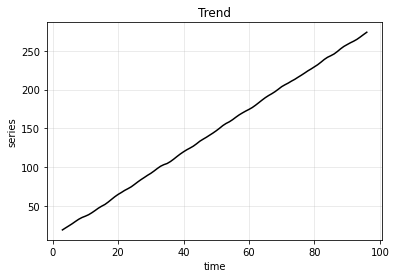

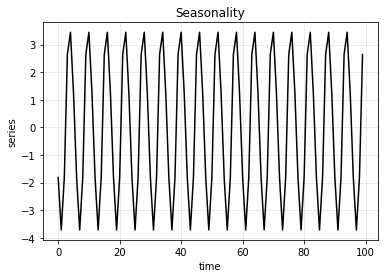

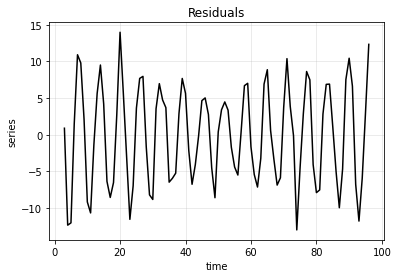

In [ ]:
run_sequence_plot(time, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(time, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(time, est_residual, title="Residuals", ylabel="series")

Let's take a quick peek at the residual values.

In [ ]:
print(est_residual)

[         nan          nan          nan   0.8840983  -12.35758556
 -12.04433461   1.48296718  10.92168902   9.79838903   2.1098592
  -9.18549316 -10.68530084  -1.39341901   5.62708429   9.51728139
   4.19733863  -6.37688101  -8.57079082  -6.54120712   2.73466783
  13.99559009   5.66172011  -2.96051089 -11.56383319  -6.98680664
   3.63407228   7.6896628    7.96829354  -1.62794659  -8.22074175
  -8.84730447   3.55066635   6.97315154   4.74605812   3.69790485
  -6.48278186  -5.95820585  -5.25809215   2.87435058   7.68322103
   5.64810713  -2.17356117  -6.77398565  -4.08149483  -0.16197687
   4.65431128   5.02346523   2.76727458  -4.5018214   -8.61021749
   0.383526     3.39920212   4.47636135   3.35785156  -1.70991311
  -4.41005501  -5.51047744   0.45522075   6.69811425   7.02150652
  -1.65724247  -5.43116384  -7.15141958  -3.23759496   6.91315694
   8.8780479    0.56710431  -3.33147621  -6.88311175  -5.88888625
   3.72543884  10.38963663   3.8706296   -0.1327287  -13.00749744
  -4.573024

We'll have to remove the first and last three values to run an ADF test since those values are all **nan**. Here's how to do that and run the test all in one call.

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -5.672045394689429
p-value:  8.876265981115738e-07


Now it's stationary!

### **Example 2 - Log transformation**


In [ ]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)

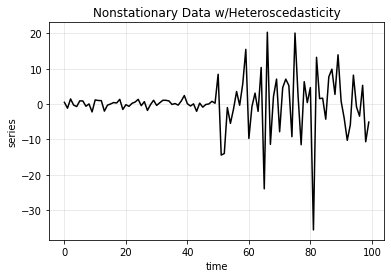

In [ ]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

In [ ]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(heteroscedasticity)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)
print("Critical Values: ", critical_values_)

ADF:  -5.462617806964473
p-value:  2.4990147402545993e-06
Critical Values:  {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}


Hmm, ADF is saying we reject the null that this series is nonstationary. However, the plot clearly shows that the variance is not constant with time. 

We can apply a log transformation. However, we cannot take the log of nonpositive values. The way we can get around this is by adding a constant to all values to make them positive.

In [ ]:
new_hetero = heteroscedasticity + 38

In [ ]:
log_new_hetero = np.log(new_hetero)

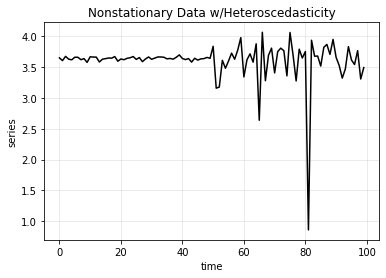

In [ ]:
run_sequence_plot(time, log_new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(log_new_hetero)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -11.988221715202044
p-value:  3.5714555887959506e-22


The big takeaway here is that the test confirms a greater confidence in the log transformed time series being stationary.

### **Example 3 - Removing Autocorrelation with Differencing**

In [ ]:
# seed to start series
seed = 3.14

# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]

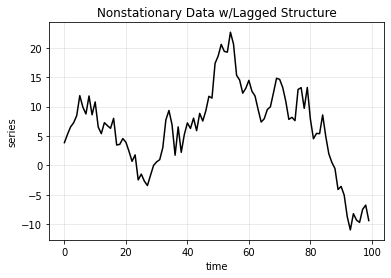

In [ ]:
run_sequence_plot(time, lagged,
                  title="Nonstationary Data w/Lagged Structure")

Notice how the current value is highly correlated with the past value? It is a Autocorrelation Structure.


In [ ]:
difference = lagged[:-1] - lagged[1:]

In [ ]:
pd.DataFrame({'original':lagged[:-1],'shift':lagged[1:]})

,original,shift
0,3.868013,5.284348
1,5.284348,6.543327
2,6.543327,7.256566
3,7.256566,8.467287
4,8.467287,11.875990
...,...,...
94,-8.231803,-9.310677
95,-9.310677,-9.713519
96,-9.713519,-7.490626
97,-7.490626,-6.769683


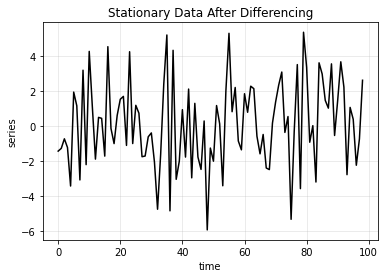

In [ ]:
run_sequence_plot(time[:-1], difference,
                  title="Stationary Data After Differencing")

In [ ]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(difference)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -10.718848851343363
p-value:  3.1892275798996705e-19


We reject the null that this data is nonstationary. It's stationary!

A key question that should be on the tip of your mind right now is how do you know if your data has autocorrelation and how do you decide what lag to use when differencing?

Another example

In [ ]:
# create a play dataframe from 1-10 (linear and squared) to test how differencing works
play = pd.DataFrame([[x for x in range(1,11)], [x**2 for x in range(1,11)]]).T
play.columns = ['original', 'squared']

Text(0.5, 1.0, 'second diff')

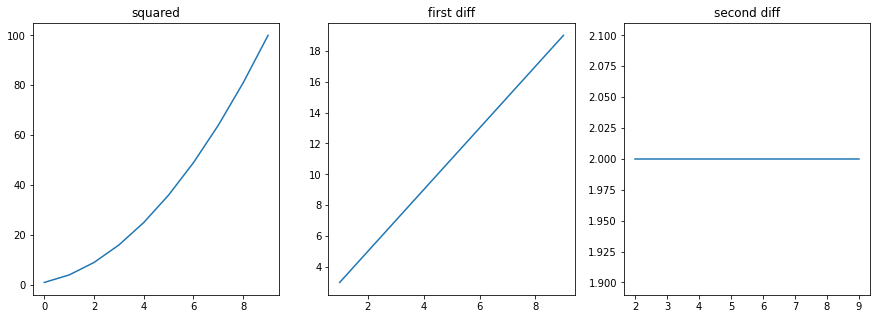

In [ ]:
fig,axes = plt.subplots(1,3,figsize = (15,5))
axes[0].plot(play.squared)
axes[0].set_title('squared')
axes[1].plot(play.squared.diff())
axes[1].set_title('first diff')
axes[2].plot(play.squared.diff().diff())
axes[2].set_title('second diff')

**NOTE:** This is similar to taking a first-order derivative.
The second diff is stationary

In [ ]:
# stationarize squared series
play.squared.diff().diff()

0    NaN
1    NaN
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: squared, dtype: float64

**NOTE:** Notice we need to difference twice on an exponential trend, and every time we do, we lose a bit of data

Text(0.5, 1.0, 'log')

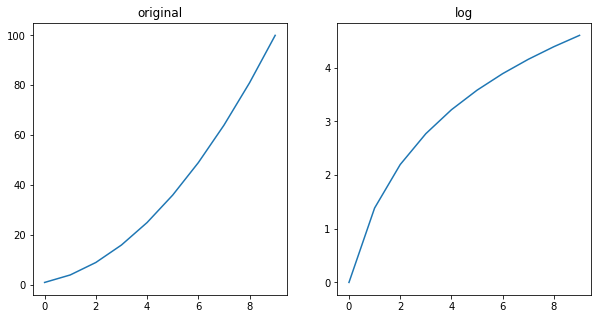

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (10,5))
axes[0].plot(play.squared)
axes[0].set_title('original')
axes[1].plot(np.log(play.squared))
axes[1].set_title('log')

It is better to use diff, log is better for eliminating variance

## **White Noise**

* Zero mean
* A constant variance/standard deviation (does not change over time)
* Zero autocorrelation at all lags

Essentially, it is a series of random numbers, and by definition, no algorithm can reasonably model its behavior.


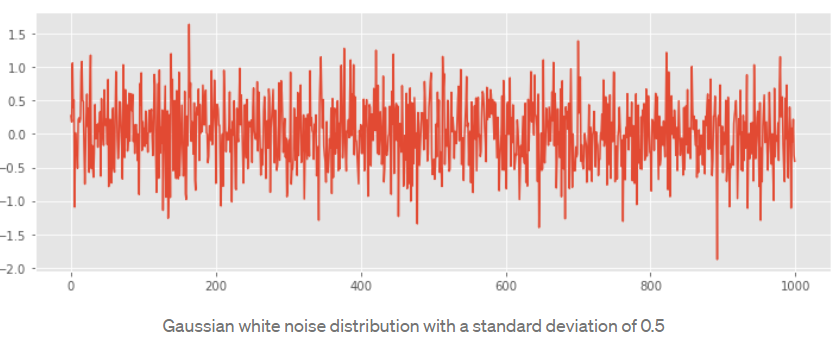



Source: https://towardsdatascience.com/how-to-detect-random-walk-and-white-noise-in-time-series-forecasting-bdb5bbd4ef81


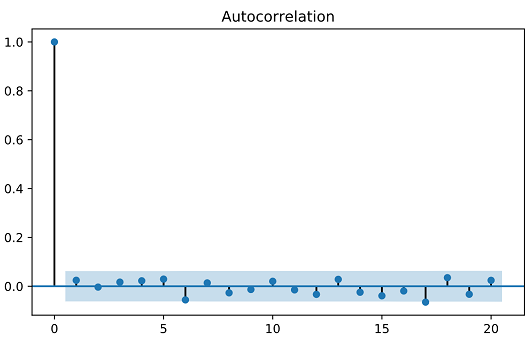

## **Random Walk**

Random Walk (non stationary) is an unpredictable distribution in time series forecasting. Unlike white noise, it has non-zero mean, non-constant std/variance, and when plotted, looks a lot like a regular distribution (Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk)

One of the key concepts in the quantitative toolbox is that of mean reversion. This process refers to a time series that displays a tendency to revert to its historical mean value. This is in contrast to a random walk (aka Brownian motion), which has no "memory" of where it has been at each particular instance of time.

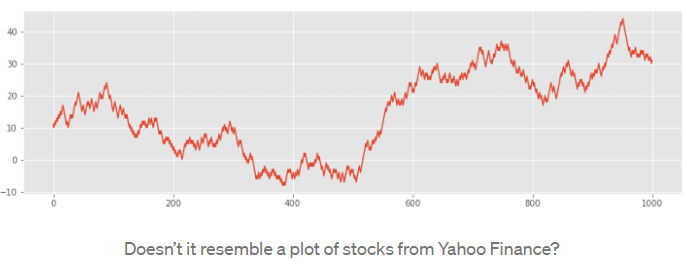

Random walk series are always cleverly disguised in this manner, but still, they are unpredictable as ever. The best guess for today’s value is yesterday’s.

* If you plot the first-order difference of a time series and the result is white noise, then it is a random walk (function diff() in python)
* Use adfuller test statistic (null hypothesis that a series follows a random walk)

Source: https://towardsdatascience.com/how-to-detect-random-walk-and-white-noise-in-time-series-forecasting-bdb5bbd4ef81

* taking first differences of a random walk, you get a stationary white noise process. For seasonal adjustments, instead of taking first differences, you will take differences with a lag corresponding to the periodicity.


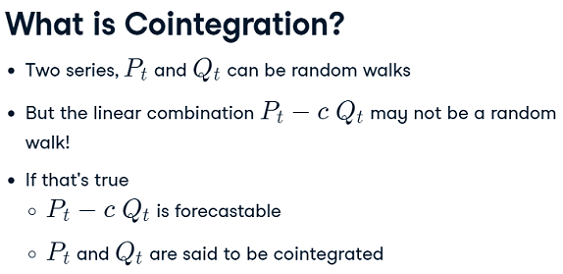

# **Smoothing**

Is a process that often improves our ability to forecast series by reducing the impact of noise. Smoothing is a well-known and oft used technique to extract those patterns. 

Smoothing comes in two flavors:
1. Simple 
2. Exponential 


### **1. Simple Smoothing**
Simple smoothing is the most obvious place to start. 

Consider the stationary data above. How would you go about extracting information from this series? 

Naturally, your inclination may be to calculate the mean and use that as an estimate to represent the series. 

Let's try that.

In [ ]:
# find mean of series
stationary_time_series_avg = np.mean(stationary)

# create array composed of mean value and equal to length of time array
sts_avg = np.full(shape=len(time), fill_value=stationary_time_series_avg, dtype='float')

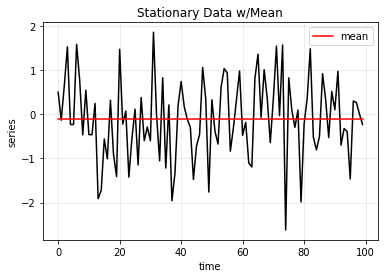

In [ ]:
run_sequence_plot(time, stationary,
                  title="Stationary Data w/Mean")
plt.plot(time, sts_avg, 'r', label="mean")
plt.legend();

We need a way to measure how far off our estimate is from reality. A common way to do this with continuous data is by calculating Mean Squared Error (MSE). 
Having MSE gives us a way to compare different estimates to see which is best.

In [ ]:
def mse(observations, estimates):
    '''
    INPUT:
        observations - numpy array of values indicating observed values
        estimates - numpy array of values indicating an estimate of values
    OUTPUT:
        Mean Square Error value
    '''
    # check arg types
    assert type(observations) == type(np.array([])), "'observations' must be a numpy array"
    assert type(estimates) == type(np.array([])), "'estimates' must be a numpy array"
    # check length of arrays equal
    assert len(observations) == len(estimates), "Arrays must be of equal length"
    
    # calculations
    difference = observations - estimates
    sq_diff = difference ** 2
    mse = sum(sq_diff)
    
    return mse

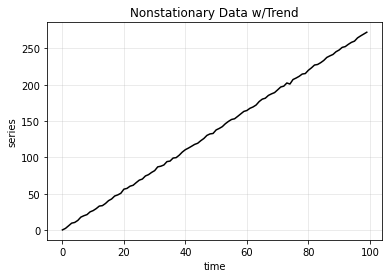

In [ ]:
trend = (time * 2.75) + stationary
run_sequence_plot(time, trend,
                  title="Nonstationary Data w/Trend")

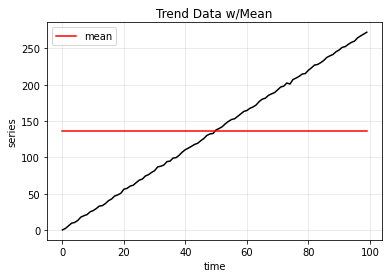

In [ ]:
# find mean of series
trend_time_series_avg = np.mean(trend)

# create array of mean value equal to length of time array
trend_avg = np.full(shape=len(time), fill_value=trend_time_series_avg, dtype='float')

run_sequence_plot(time, trend,
                  title="Trend Data w/Mean")
plt.plot(time, trend_avg, 'r', label="mean")
plt.legend();

we must find another way to approximate the underlying pattern inherent in the data.

### **2. Moving Average Smoothing**

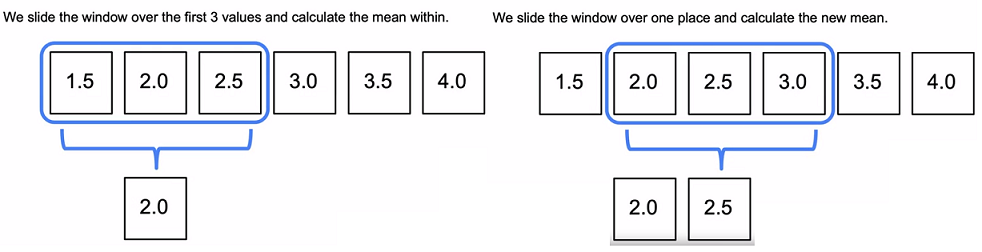

In [ ]:
def moving_average(observations, window=3, forecast=False):
    '''returns the smoothed version of an array of observations.'''
    cumulative_sum = np.cumsum(observations, dtype=float)
    cumulative_sum[window:] = cumulative_sum[window:] - cumulative_sum[:-window]
    if forecast:
        return np.insert(cumulative_sum[window - 1:] / window, 0, np.zeros(3))
    else:
        return cumulative_sum[window - 1:] / window

In [ ]:
smoothed_trend = moving_average(trend, window=3, forecast=False)

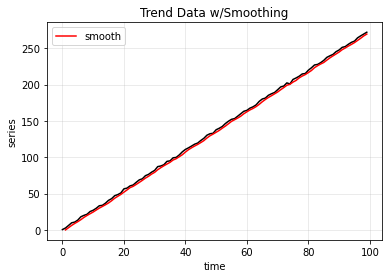

In [ ]:
run_sequence_plot(time, trend,
                  title="Trend Data w/Smoothing")
plt.plot(time[1:], np.insert(smoothed_trend,0,0), 'r', label="smooth")
plt.legend();

Not bad at all! You can see the smoothed version picks up the trend rather nicely, far better than the simple average. Now we're getting somewhere.

Let's try the same thing with seasonality.

In [ ]:
seasonality = 10 + np.sin(time) * 10
smoothed_seasonality = moving_average(seasonality, window=3, forecast=False)

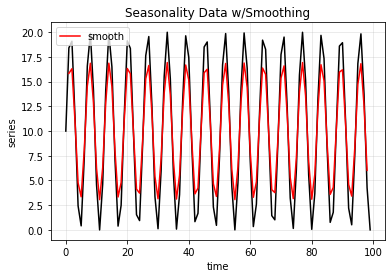

In [ ]:
run_sequence_plot(time, seasonality,
                  title="Seasonality Data w/Smoothing")
plt.plot(time[1:-1], smoothed_seasonality, 'r', label="smooth")
plt.legend(loc='upper left');

It's far from perfect but clearly picks up the inherent pattern contained within this seasonal pattern.

Lastly, let's see how moving average handles trend, seasonality, and a bit of noise.

In [ ]:
trend_seasonality = trend + seasonality + stationary
smoothed_trend_seasonality = moving_average(trend_seasonality, window=3, forecast=False)

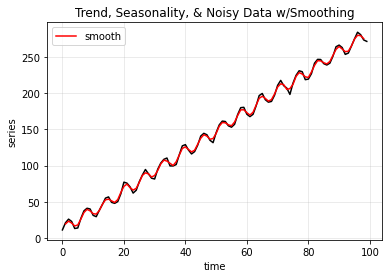

In [ ]:
run_sequence_plot(time, trend_seasonality,
                  title="Trend, Seasonality, & Noisy Data w/Smoothing")
plt.plot(time[1:-1], smoothed_trend_seasonality, 'r', label="smooth")
plt.legend(loc='upper left');

Overall this method is doing a decent job on these toy datasets. You can see it's picking up key patterns in the data. However, we've been weighting all observations equally. 

### **3. Exponential Smoothing**
Exponential smoothing is a way to weight observations differently. Specifically, recent observations are weighted moreso than more distant ones. This makes intuitive sense.

In [ ]:
values = np.array([1, 2, 4, 8, 16, 32, 64])
ma_smoothed_vals = moving_average(values, window=3, forecast=True)

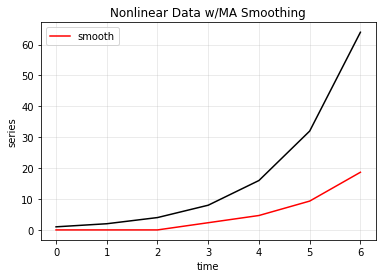

In [ ]:
t = np.arange(len(values))
run_sequence_plot(t, values,
                  title="Nonlinear Data w/MA Smoothing")
plt.plot(t, ma_smoothed_vals[:-1], 'r', label="smooth")
plt.legend(loc='upper left');

There are three key exponential smoothing techniques you need to be aware of:
1. Single Exponential Smoothing - no trend or seasonality
2. Double Exponential Smoothing - captures trend
3. Triple Exponential Smoothing - captures trend & seasonality

In [ ]:
train = trend_seasonality[:-5]
test = trend_seasonality[-5:]

In [ ]:
# find mean of series
trend_seasonal_avg = np.mean(trend_seasonality)

# create array of mean value equal to length of time array
simple_avg_preds = np.full(shape=len(test), fill_value=trend_seasonal_avg, dtype='float')

# mse
simple_mse = mse(test, simple_avg_preds)

# results
print("Predictions: ", simple_avg_preds)
print("MSE: ", simple_mse)

Predictions:  [145.95522643 145.95522643 145.95522643 145.95522643 145.95522643]
MSE:  86295.31932923789


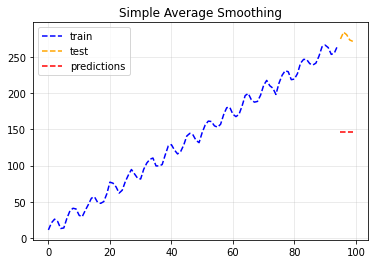

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], simple_avg_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Simple Average Smoothing")
plt.grid(alpha=0.3);

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))
single_mse = mse(test, single_preds)
print("Predictions: ", single_preds)
print("MSE: ", single_mse)

Predictions:  [265.26326384 265.26326384 265.26326384 265.26326384 265.26326384]
MSE:  830.0010163891252


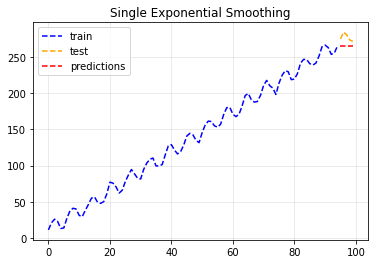

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3);

In [ ]:
from statsmodels.tsa.api import Holt

double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
double_mse = mse(test, double_preds)
print("Predictions: ", double_preds)
print("MSE: ", double_mse)

Predictions:  [267.96826103 270.67325822 273.37825541 276.08325259 278.78824978]
MSE:  354.30331326298307


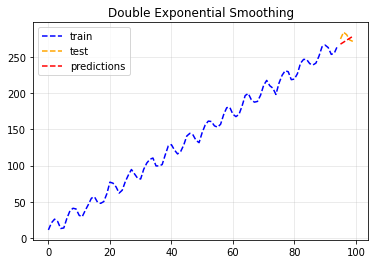

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3);

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=13).fit(optimized=True)
triple_preds = triple.forecast(len(test))
triple_mse = mse(test, triple_preds)
print("Predictions: ", triple_preds)
print("MSE: ", triple_mse)

Predictions:  [275.8332795  280.86356592 282.18365434 277.6317621  276.3426339 ]
MSE:  50.01110873552804


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


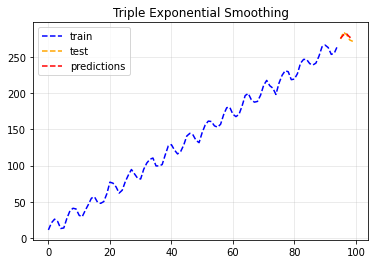

In [ ]:
plt.plot(time[:-5], train, 'b--', label="train")
plt.plot(time[-5:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-5:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3);

In [ ]:
data_dict = {'MSE':[simple_mse, single_mse, double_mse, triple_mse]}
df = pd.DataFrame(data_dict, index=['simple', 'single', 'double', 'triple'])
print(df)

                 MSE
simple  86295.319329
single    830.001016
double    354.303313
triple     50.011109


# **Visualizations**

## **Autocorrelation Function**

Source: https://towardsdatascience.com/how-to-detect-random-walk-and-white-noise-in-time-series-forecasting-bdb5bbd4ef81

The Autocorrelation Function (ACF) finds the correlation coefficient between a time series and its lagged version at each lag k.

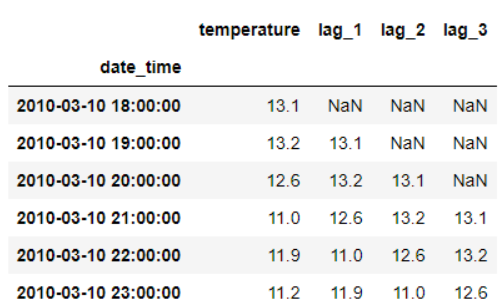


The XAxis is the lag k, and the YAxis is the Pearson’s correlation coefficient at each lag. The red shaded region is a confidence interval.

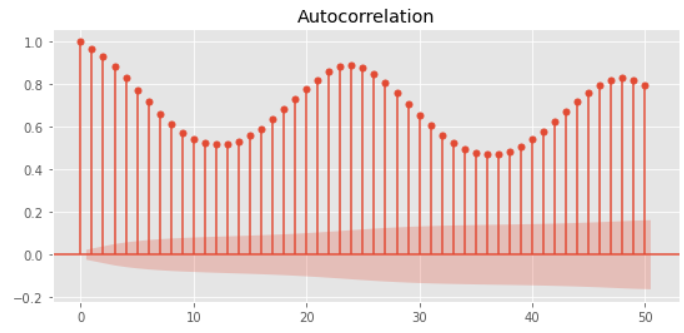

An Autocorrelation Plot is commonly used to detect dependence on prior observations. 

## **Partial Autocorrelation Function**

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The Partial Autocorrelation Plot also summarizes dependence on past observations. However, it measures partial results (including all lags)

Choosing the order *p* of the AR model is important.


## **Seasonal Subseries Plot**

Shows the average level for each seasonal period and illustrates how individual observations relate to this level

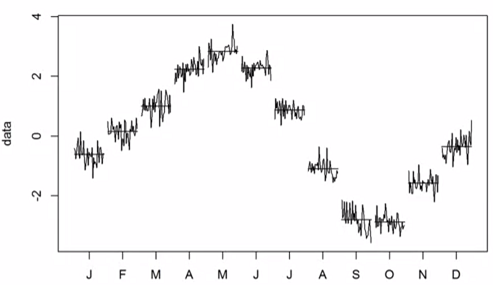

This example shows a clear monthly seasonal effect

# **Models**

## **Time Series Modeling Process**
Time series model selection is driven by the Trend and Seasonal components of our raw data. The general approach for analysis looks like this:

1. Plot the data and determine Trends and Seasonality
    1. Difference or take the log of the data (multiple times if needed) to remove trends for [certain model applications](https://en.wikipedia.org/wiki/Stationary_process)
    1. Stationairity is needed for ARMA models
1. Determine if we have additive or multiplicative data patterns
1. Select the appropriate algorithm based on the chart below
1. Determine if model selection is correct with these tools
    - Ljung-Box Test
    - Residual Errors (Normal Distribution with zero mean and constant variance-homoskedastic, i.i.d)
    - Autocorrelation Function (ACF)
    - Partial Autocorrelation Function (PACF)

Algorithm | Trend | Seasonal | Correlations
---|---|---|---
ARIMA | X |X|X
SMA Smoothing |X||
Simple Exponential Smoothing |X||
Seasonal Adjustment |X|X|
Holt's Exponential Smoothing |X||
Holt-Winters |X|X|


### [Box-Jenkins Method](https://en.wikipedia.org/wiki/Box–Jenkins_method)

ACF Shape|Indicated Model
---|---
Exponential, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to identify the order of the autoregressive model.
Alternating positive and negative, decaying to zero|Autoregressive model. Use the partial autocorrelation plot to help identify the order.
One or more spikes, rest are essentially zero|Moving average model, order identified by where plot becomes zero.
Decay, starting after a few lags|Mixed autoregressive and moving average (ARMA) model.
All zero or close to zero|Data are essentially random.
High values at fixed intervals|Include seasonal autoregressive term.
No decay to zero|Series is not stationary.

## **ARMA (p, q): AR(p) + MA(q)**

* AR Model - Specify that the current value of the  series depends linearly on its own previous values and on a stochastic term (dependence on its past own values)
* MA Model - Specify that the current value of the series depends linearly on the series' mean and a set of prior (observed) white noise error terms.(dependence on forecast errors)


###Requirements:
* Stationarity
* Rule of thumb: at least 100 observations

When we have autocorrelation between outcomes and their ancestors, we will see a theme, or relationship in the outcome plot. This relationship can be modeled in its own way, allowing us to predict the future with a confidence level commensurate to the strength of the relationship and the proximity to known values

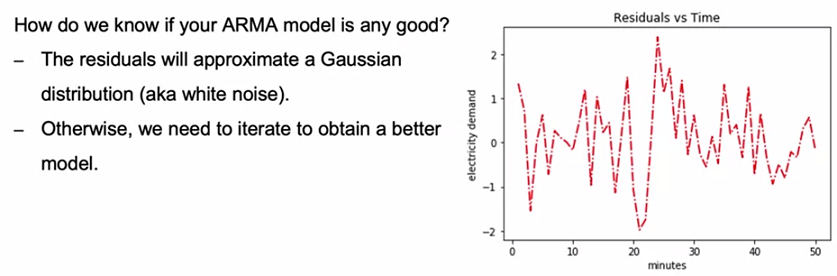

### **Autoregression Model - AR(p)**

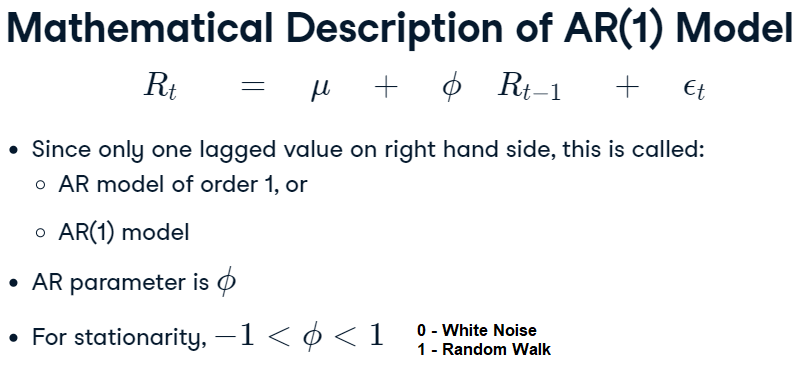



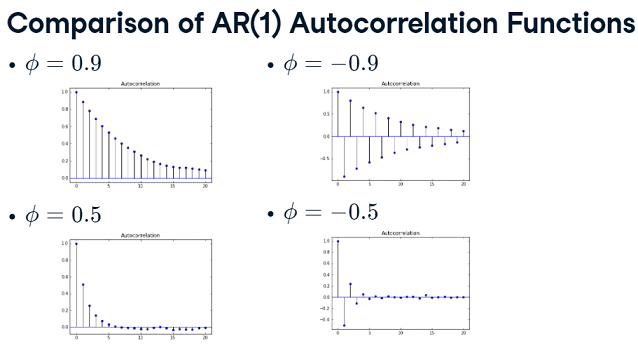

The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter


#### To choose the order you can:
* plot PACF
* Information Criteria

#### Information Criteria (AIC or BIC)

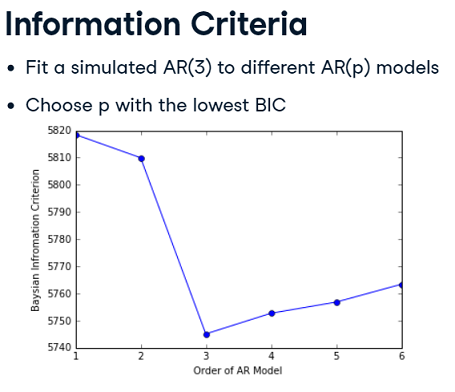

#### How to determine the order p of AR model using PACF?
1. Plot PCAF
2. Choose lag p such that partial correlation becomes insignificant for p+1 and beyond

In [ ]:
# reproducibility
np.random.seed(123)

# create autocorrelated data
time = np.arange(100)
#Assuming 0 mean
ar1_sample = np.zeros(100)

# Set our first number to a random value with expected mean of 0 and standard deviation of 2.5
ar1_sample[0] += np.random.normal(loc=0, scale=2.5, size=1)

# Set every value thereafter as 0.7 * the last term plus a random error
for t in time[1:]:
    ar1_sample[t] = (0.7 * ar1_sample[t-1]) + np.random.normal(loc=0, scale=2.5, size=1)

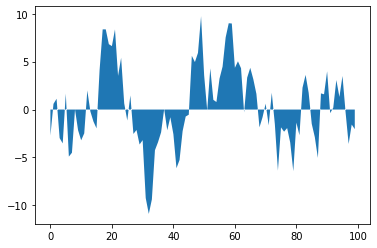

In [ ]:
plt.fill_between(time,ar1_sample)

Here we create prediction for generated data to show we came up with a model that is approximately ar(1) with phi  ≈  0.7

In [ ]:
# using ARMA model from statsmodel package
model = sm.tsa.ARMA(ar1_sample, (1, 0)).fit(trend='nc', disp=0)
model.params

array([0.7338952])

In [ ]:
# Below is function to help in generating different series
from statsmodels.tsa.arima_process import arma_generate_sample

arparams = np.array([0.3,0.3])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

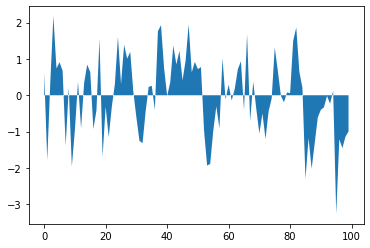

In [ ]:
plt.fill_between(time,y)

In [ ]:
# Again running statsmodel ARMA to predict parameters for generated data
model = sm.tsa.ARMA(y, (2, 0)).fit(trend='nc', disp=0)
model.params

array([0.33804097, 0.17142451])

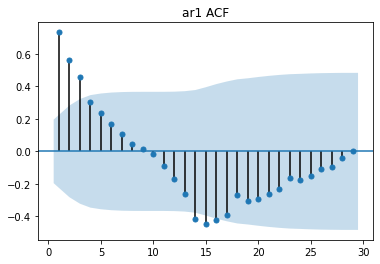

In [ ]:
fig = sm.tsa.graphics.plot_acf(ar1_sample, lags=range(1,30), alpha=0.05,title = 'ar1 ACF')

the blue region represents a confidence interval. Alpha in this case was set to 0.05 (95% confidence interval).

Note that if lag 1 shows strong autocorrelation, lag 2 will show strong autocorrelation as well since lag 1 is correlated with lag 2 and lag 2 with lag 3. That is why you see the ar1 model having the slowly decaying correlation.

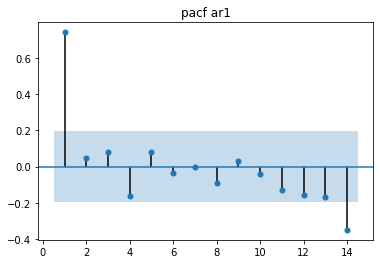

In [ ]:
fig = sm.tsa.graphics.plot_pacf(ar1_sample, lags=range(1,15), alpha=0.05, title = 'pacf ar1')

The PACF is a useful tool for identifying the order of the AR model.

AR processes will exhibit exponential decay in ACF and a cut-off in PACF


### **Moving Average Model - MA(q)**


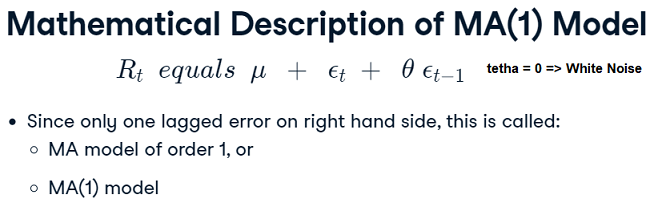


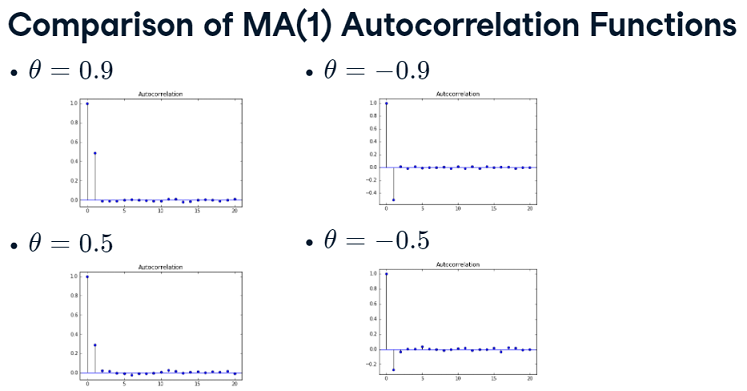

Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. 

### How to determine the order q of MA model?
1. Plot ACF
2. Choose lag q such that autocorrelation becomes insignificant for q+1 and beyond

#### **MA Models != Moving Average Smoothing**

Moving average smoothing is useful for estimating trend and seasonality of past data. MA models, on the other hand, are a useful forecasting model that regresses on past forecast errors in order to forecast future values.

In [ ]:
# create autocorrelated data
time = np.arange(100)
#mean 0
ma1_sample = np.zeros(100)
#create vector of random normally distributed errors
error = np.random.normal(loc=0, scale=2.5, size=100)
# set first value to one of the random errors
ma1_sample[0] += error[0]

#set future values to 0.4 times error of prior value plus the current error term
for t in time[1:]:
    ma1_sample[t] = (0.4 * error[t-1]) + error[t]

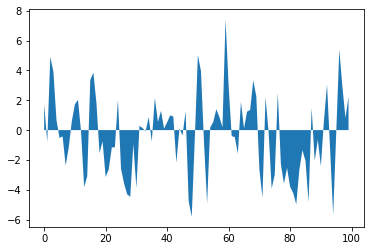

In [ ]:
plt.fill_between(time,ma1_sample)

In [ ]:
# find model params for generated sample 
model = sm.tsa.ARMA(ma1_sample, (0, 1)).fit(trend='nc', disp=0)
model.params

array([0.45800363])

In [ ]:
# Below is function to help in generating different series
np.random.seed(123)
arparams = np.array([0])
maparams = np.array([0.4,-0.4])
ar = np.r_[1, -arparams] # add zero-lag and negate, np.r_ is simply making it one array
ma = np.r_[1, maparams] # add zero-lag
y = arma_generate_sample(ar, ma, 100)

In [ ]:
# Just to show we came up with a model that is approximately ar(1) with phi = 0.7
# We will get back to modeling

model = sm.tsa.ARMA(y, (0, 2)).fit(trend='nc', disp=0)
model.params

array([ 0.45956841, -0.41054156])

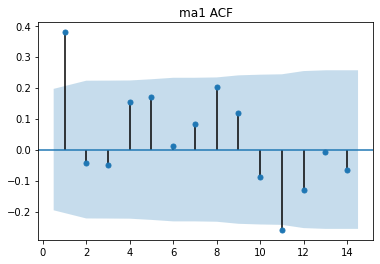

In [ ]:
fig = sm.tsa.graphics.plot_acf(ma1_sample, lags=range(1,15), alpha=0.05,title = 'ma1 ACF')

Only the prior error has an effect on future errors.

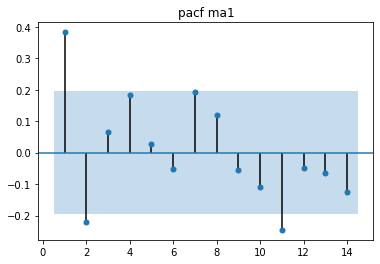

In [ ]:
fig = sm.tsa.graphics.plot_pacf(ma1_sample, lags=range(1,15), alpha=0.05, title = 'pacf ma1')

MA processes will exhibit exponential decay in PACF and a cut-off in ACF

### **Guideline for choosing AR/MA Models**

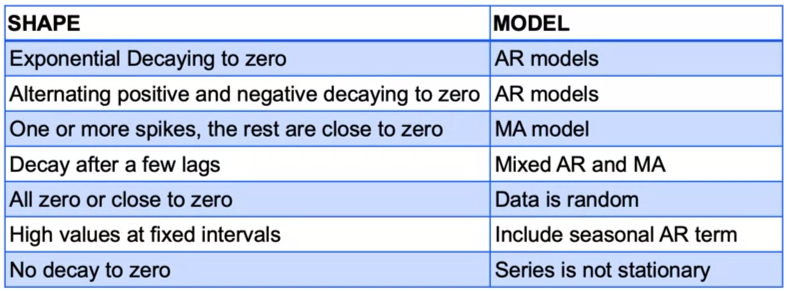

## **ARIMA Model**

Stands for Auto-Regressive Integrated Moving Average
Three components:
1. AR Model
2. Integrated Component
3. MA Model

ARIMA(p, d, q)
- p is number of AR terms
- d is number of times that we would difference our data
- q is number of MA terms

Some rules to highlight from the Duke ARIMA Guide:
1. If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing
2. If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and patternless, then the series does not need a higher order of  differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced.  BEWARE OF OVERDIFFERENCING!!
3. A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that the original series has a time-varying trend (e.g. a random trend or LES-type model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data and convert to datetime
monthly_temp = pd.read_csv('drive/MyDrive/Github/time-series/data/mean-monthly-temperature-1907-19.csv', 
                           skipfooter=2, 
                           infer_datetime_format=True, 
                           header=0, 
                           index_col=0, engine='python',
                           names=['month', 'temp'])

monthly_temp.index = pd.to_datetime(monthly_temp.index)

In [ ]:
monthly_temp.head()

,temp
month,
1907-01-01,33.3
1907-02-01,46.0
1907-03-01,43.0
1907-04-01,55.0
1907-05-01,51.8


In [ ]:
# describe
monthly_temp.describe()

,temp
count,792.000000
mean,53.553662
std,15.815452
min,11.200000
25%,39.675000
50%,52.150000
75%,67.200000
max,82.400000


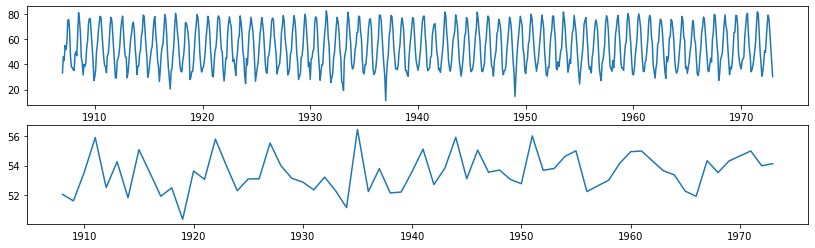

In [ ]:
# resample to annual and plot each
plt.rcParams['figure.figsize'] = [14, 4]
annual_temp = monthly_temp.resample('A').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(monthly_temp)
axes[1].plot(annual_temp)

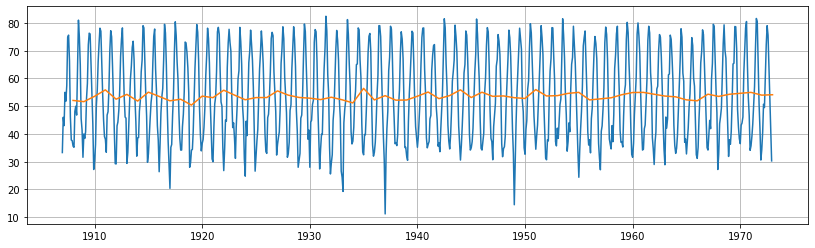

In [ ]:
# plot both on same figure
plt.plot(monthly_temp)
plt.plot(annual_temp)
plt.grid(b=True);

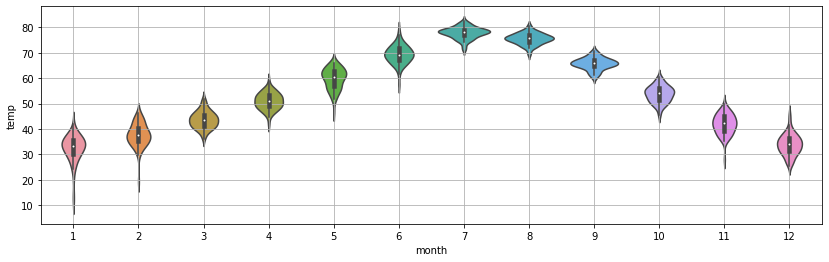

In [ ]:
# violinplot of months to determine variance and range
sns.violinplot(x=monthly_temp.index.month, y=monthly_temp.temp)
plt.grid(b=True);

Clearly we have a seasonality

In [ ]:
# split data into 10 chunks
chunks = np.split(monthly_temp.temp, indices_or_sections=12)

In [ ]:
mean_vals = np.mean(chunks,axis=1)
var_vals = np.var(chunks,axis=1)
vals = {'mean_vals': mean_vals , 'var_vals': var_vals}
mean_var = pd.DataFrame(vals)
mean_var

,mean_vals,var_vals
0,52.674242,225.907973
1,53.654545,246.031570
2,52.837879,247.400838
3,54.078788,250.787429
4,52.439394,277.865721
5,53.457576,283.619412
6,53.718182,224.882397
7,54.422727,265.442059
8,53.457576,238.561230
9,54.425758,257.425852


Mean and Variance can be considered constant (there is no trend), but we can not say about seasonality (because seasonality happens every 12 months and we have only 792 observations)

In [ ]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic         -6.481466e+00
p-value                 1.291867e-08
Lags Used               2.100000e+01
Observations Used       7.700000e+02
Critical Value (1%)    -3.438871e+00
Critical Value (5%)    -2.865301e+00
Critical Value (10%)   -2.568773e+00
dtype: float64


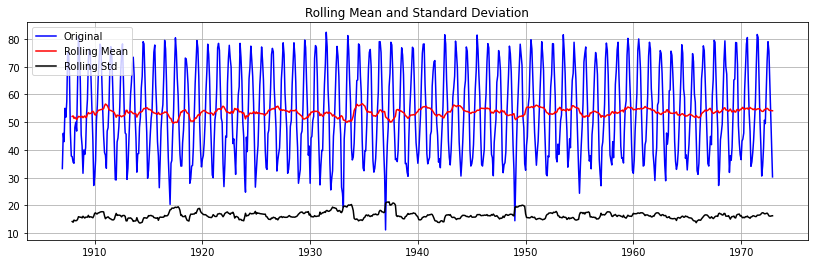

In [ ]:
# run DFT on monthly
dftest(monthly_temp.temp)
# p-value allows us to reject a unit root: data is stationary

Test Statistic         -7.878242e+00
p-value                 4.779473e-12
Lags Used               0.000000e+00
Observations Used       6.500000e+01
Critical Value (1%)    -3.535217e+00
Critical Value (5%)    -2.907154e+00
Critical Value (10%)   -2.591103e+00
dtype: float64


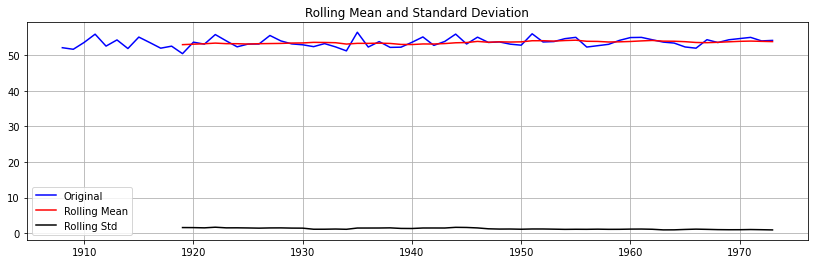

In [ ]:
# run DFT on annual
dftest(annual_temp.temp)

The p-value allows us to reject a unit root (i.e. the data is stationary, because we do not have seasonality in year).

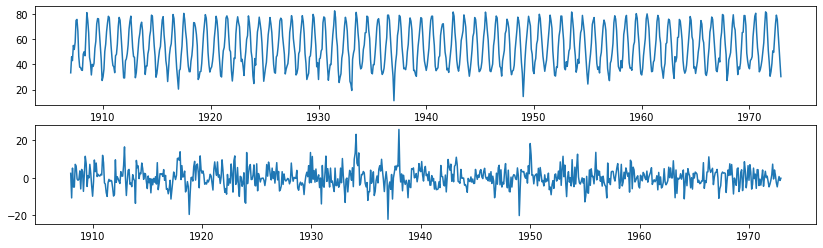

In [ ]:
# Important to note that values have strong seasonality and adf test as well as rolling mean may not capture this.
# That is why it is always important to pay attention to run sequence plot
monthly_temp['lag_12'] = monthly_temp.shift(12)
monthly_temp['seasonal_diff'] = monthly_temp.temp - monthly_temp['lag_12']

fig,axes = plt.subplots(2,1)
axes[0].plot(monthly_temp.temp,label ='original')
axes[1].plot(monthly_temp.seasonal_diff,label = 'seasonal diff')

We subtract the seasonality (showed in chart 1)

In [ ]:
# define helper plot function for visualization
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()

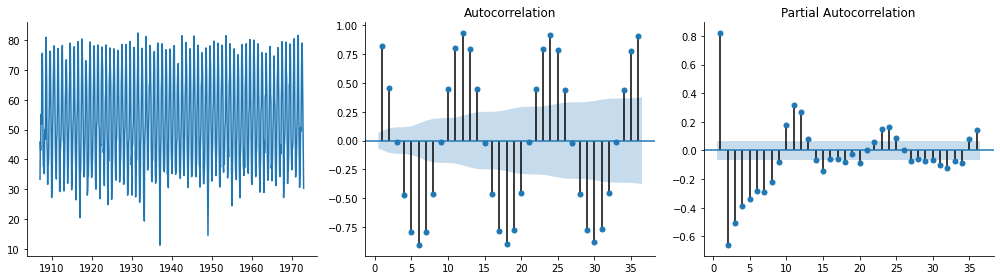

In [ ]:
# helper plot for monthly temps
plots(monthly_temp.temp, lags=36);
# open Duke guide for visual
# we note a 12-period cycle (yearly) with suspension bridge design, so must use SARIMA

## **SARIMA Model**

An extension of ARIMA models to address seasonality
SARIMA(p, d, q)(P, D, Q), PDQ applied across season

- p is number of AR terms in regards to seasonal lag
- d is number of times that we would difference our seasonal lag (as seen above)
- q is number of MA terms in regards to seasonal lag
- s is number of periods in a season

How do you choose p, d, q, P, D, Q?
* Visually inspect run sequence plot for trend and seasonality
* ACF Plot
* PACF Plot
* Treat as hyperparameter(cross validate)
* Information Criteria (AIC, BIC)

In [ ]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(monthly_temp.temp, 
                                order=(1,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               temp   No. Observations:                  792
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood               -2128.873
Date:                            Tue, 28 Dec 2021   AIC                           4265.746
Time:                                    16:57:35   BIC                           4284.383
Sample:                                01-01-1907   HQIC                          4272.914
                                     - 12-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0127      0.007      1.698      0.090      -0.002       0.027
ar.L1          0.1791      0.035      5.105      0.000       0.110       0.248
ma.S.L12      -0.9995      1.142     -0.876      0.381      -3.237       1.238
sigma2        12.8929     14.600      0.883      0.377     -15.723      41.509
===================================================================================
Ljung-Box (Q):                       27.91   Jarque-Bera (JB):               252.77
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.56
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

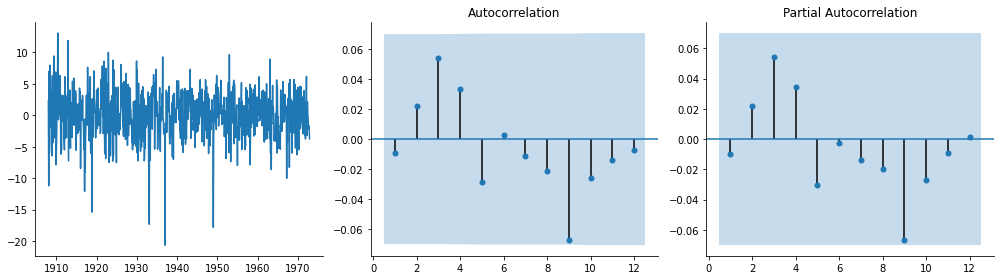

In [ ]:
# plot resids
plots(sar.resid[sar.loglikelihood_burn:], lags=12);

No autocorrelation (it is random, it is what we are looking for)

**Thought process:**  

010010 is probably overdifferenced as we can see by negative ACF at lag 1

000010 is a big underdiff at seasonal lag, but with better AIC

Looks like 000010,12 and Trend='c' per rule

Looking back at seasonal we notice negative ACR spike at 12: we will thus add a SMA term and we see a big drop in AIC to 4289

looks like ACF looks good at seasonal lags, so we move back to ARIMA portion.

ACF shows we can use AR terms. AR=1,2 or 3 have similar AIC

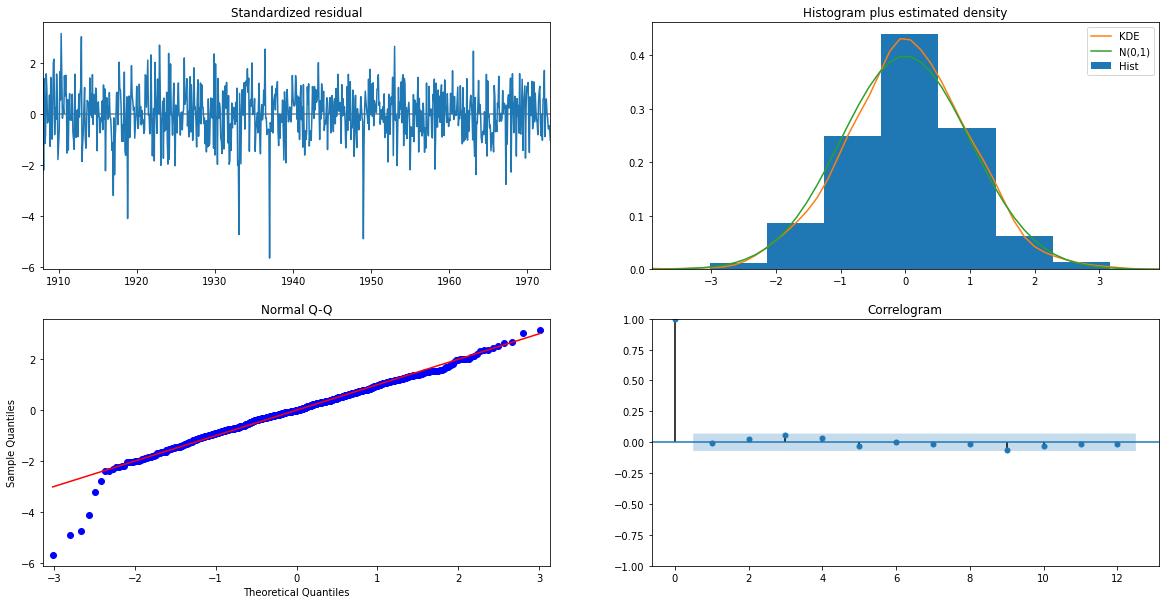

In [ ]:
# plot residual diagnostics
sar.plot_diagnostics(lags=12,figsize = (20,10),);

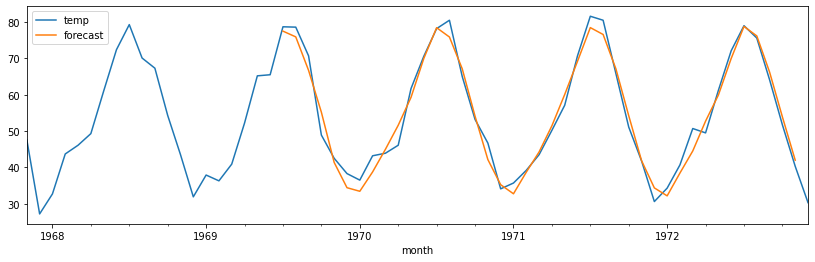

In [ ]:
# plot predictions
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
monthly_temp['forecast'] = sar.predict(start = 750, end= 790)  
monthly_temp[730:][['temp', 'forecast']].plot();

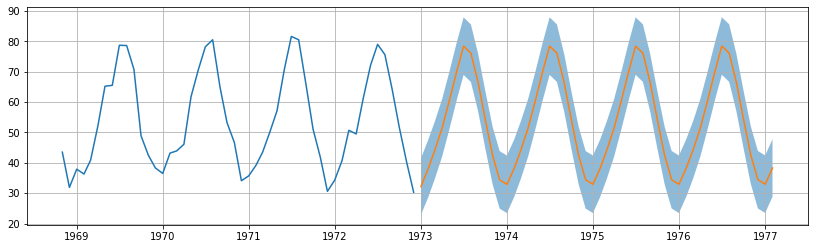

In [ ]:
# can use get forecast to create a forecast object
future_fcst = sar.get_forecast(50)
# That will have a method to pull in confidence interval 
confidence_int = future_fcst.conf_int(alpha = 0.01)
# Has an attribute to pull in predicted mean
fcst = future_fcst.predicted_mean
# Plot predictions and confidence intervals
plt.plot(monthly_temp.temp[-50:])
plt.plot(fcst)
plt.fill_between(confidence_int.index,confidence_int['lower temp'],confidence_int['upper temp'],alpha = 0.5)
plt.grid()

### **Statistical Tests**


- [Normality (Jarque-Bera)](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_normality)
    - Null hypothesis is normally distributed residuals (good, plays well with RMSE and similar error metrics)

- [Serial correlation (Ljung-Box)](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_serial_correlation)
    - Null hypothesis is no serial correlation in residuals (independent of each other)

- [Heteroskedasticity](http://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity.html#statsmodels.tsa.statespace.sarimax.SARIMAXResults.test_heteroskedasticity)
    - Tests for change in variance between residuals.
    - The null hypothesis is no heteroskedasticity. That means different things depending on which alternative is selected:
        - Increasing: Null hypothesis is that the variance is not increasing throughout the sample; that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.
        - Decreasing: Null hypothesis is that the variance is not decreasing throughout the sample; that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample.
        - Two-sided (default): Null hypothesis is that the variance is not changing throughout the sample. Both that the sum-of-squares in the earlier subsample is not greater than the sum-of-squares in the later subsample and that the sum-of-squares in the later subsample is not greater than the sum-of-squares in the earlier subsample.

- [Durbin Watson](https://en.wikipedia.org/wiki/Durbin–Watson_statistic)
    - Tests autocorrelation of residuals: we want between 1-3, 2 is ideal (no serial correlation)

In [ ]:
# create and run statistical tests on model
norm_val, norm_p, skew, kurtosis = sar.test_normality('jarquebera')[0]
lb_val, lb_p = sar.test_serial_correlation(method='ljungbox',)[0]
het_val, het_p = sar.test_heteroskedasticity('breakvar')[0]


# we want to look at largest lag for Ljung-Box, so take largest number in series
# there's intelligence in the method to determine how many lags back to calculate this stat
lb_val = lb_val[-1]
lb_p = lb_p[-1]
durbin_watson = sm.stats.stattools.durbin_watson(
    sar.filter_results.standardized_forecasts_error[0, sar.loglikelihood_burn:])

print('Normality: val={:.3f}, p={:.3f}'.format(norm_val, norm_p));
print('Ljung-Box: val={:.3f}, p={:.3f}'.format(lb_val, lb_p));
print('Heteroskedasticity: val={:.3f}, p={:.3f}'.format(het_val, het_p));
print('Durbin-Watson: d={:.2f}'.format(durbin_watson))

Normality: val=252.770, p=0.000
Ljung-Box: val=27.915, p=0.925
Heteroskedasticity: val=0.708, p=0.006
Durbin-Watson: d=2.01


### **Note on autofit methods**
R has an autoARIMA function (and other automagic methods) that gridsearches/optimizes our model hyperparameters for us. Over time, more of these goodies are porting to Python (e.g. pmdarima). While there's nothing wrong with utilizing these resources, the _human makes the final determination!_ Don't become over-reliant on these methods, especially early on when you are grasping the underlying mechanics and theory!

In [ ]:
#from pyramid.arima import auto_arima
stepwise_model = pm.auto_arima(monthly_temp.temp, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.31 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=4796.839, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4546.179, Time=2.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.57 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=4794.867, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4769.737, Time=0.20 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4451.142, Time=6.01 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=20.03 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=9.57 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=4477.926, Time=5.03 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=4452.084, Time=6.83 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=4450.271, Time=17.12 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=4545.537, Time=6.18 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=30.45 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : A

In [ ]:
from dateutil.relativedelta import relativedelta
def future_preds_df(model,series,num_months):
    pred_first = series.index.max()+relativedelta(months=1)
    pred_last = series.index.max()+relativedelta(months=num_months)
    date_range_index = pd.date_range(pred_first,pred_last,freq = 'MS')
    vals = model.predict(n_periods = num_months)
    return pd.DataFrame(vals,index = date_range_index)

In [ ]:
preds = future_preds_df(stepwise_model,monthly_temp.temp,100)

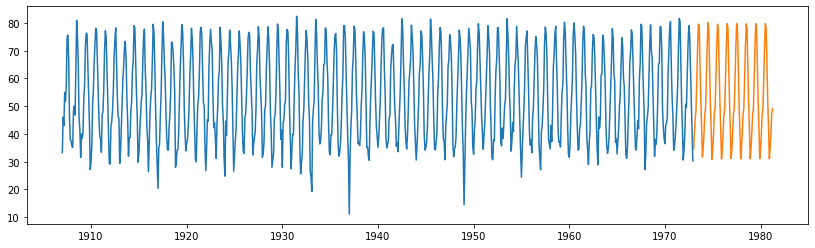

In [ ]:
plt.plot(monthly_temp.temp)
plt.plot(preds)

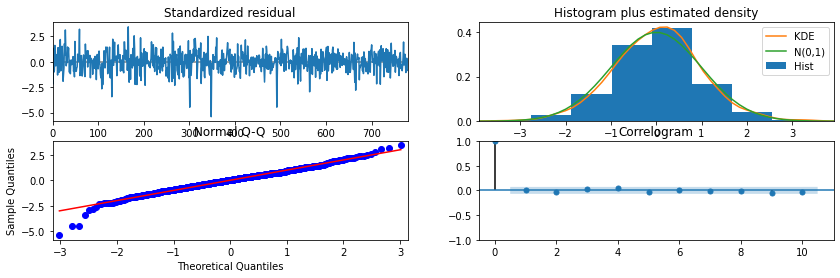

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
print('auto-fit order: :', stepwise_model.order)
print('auto-fit seasonal_order: :', stepwise_model.seasonal_order)

auto-fit order: : (1, 0, 1)
auto-fit seasonal_order: : (2, 1, 0, 12)


When deciding on a model, often what truly matters is how well we would be able to produce out of sample predictions. Here we create a function that looks at multiple out of sample predictions to see which model had lowest out of sample error